In [145]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression,SGDRegressor
from datetime import datetime
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [159]:
df = pd.read_csv("AirBookingDirekt24/AirBookingDirekt24_training.csv")

In [160]:
df

,id,preis,endreinigung,typ,stadt,stadtteil,lat,lon,bewertungen,bewertung,...,badewanne,kaffeemaschine,geschirrspueler,ebenerdig,kuehlschrank,rauchen,haustiere,hochstuhl,kinderkrippe,spielekonsole
0,10000,160.0,1,Apartment,SF,Noe Valley,37.743109,-122.429418,10,96,...,0,0,0,0,0,0,0,0,0,0
1,10001,200.0,1,Apartment,NYC,Battery Park City,40.718417,-74.015227,4,100,...,0,0,0,0,0,0,0,0,0,0
2,10002,85.0,0,Apartment,LA,Hollywood Hills,34.109349,-118.323667,5,92,...,0,0,0,0,0,0,0,0,0,0
3,10003,160.0,1,Apartment,NYC,Greenpoint,40.722155,-73.942034,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10004,130.0,1,Apartment,NYC,Kips Bay,40.740924,-73.979927,2,100,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,34995,NaN,1,Apartment,DC,Stronghold,38.925433,-77.007269,154,96,...,1,0,0,0,0,0,0,0,0,1
24996,34996,NaN,1,Apartment,Boston,North End,42.364847,-71.052334,94,89,...,0,0,0,0,0,0,1,0,0,0
24997,34997,NaN,1,Apartment,Boston,Dorchester,42.318314,-71.064099,43,93,...,0,1,0,0,1,0,0,0,0,0
24998,34998,NaN,1,Apartment,NYC,Lower East Side,40.716069,-73.984385,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
df.columns

Index(['id', 'preis', 'endreinigung', 'typ', 'stadt', 'stadtteil', 'lat',
       'lon', 'bewertungen', 'bewertung', 'gaeste', 'baeder', 'schlafzimmer',
       'betten', 'internet', 'wlan', 'kueche', 'heizung', 'klimaanlage',
       'haartrockner', 'familienfreundlich', 'buegeleisen', 'waschmaschine',
       'trockner', 'rauchmelder', 'kohlenmonoxidmelder', 'feuerloescher',
       'erstehilfekoffer', 'fernsehen', 'kabelfernsehen', 'fruehstueck',
       'kamin', 'fahrstuhl', 'pool', 'fitnessstudio', 'whirlpool',
       'rollstuhlgeeignet', 'bettwaesche', 'mikrowelle', 'geschirr', 'ofen',
       'herd', 'badewanne', 'kaffeemaschine', 'geschirrspueler', 'ebenerdig',
       'kuehlschrank', 'rauchen', 'haustiere', 'hochstuhl', 'kinderkrippe',
       'spielekonsole'],
      dtype='object')

In [158]:
#traindata = traindata.loc[(traindata["baeder"] <= 5) | (traindata["preis"] > 10) | (traindata["bewertungen"] != 0)]
#traindata[["id", "baeder", "bewertung", "bewertungen", "preis"]]
#test = traindata.loc[traindata["betten"] > 6]
#test[["betten", "preis", "gaeste"]]
#traindata
#test  = df.loc[isinstance(df["stadt"], (float, int))]
#df["location"] = df['stadt'].astype(str) + df['stadtteil'].astype(str)
#df["location"]

test = df.loc[df["stadtteil"].apply(type) == float] 
test

,id,preis,endreinigung,typ,stadt,stadtteil,lat,lon,bewertungen,bewertung,...,kaffeemaschine,geschirrspueler,ebenerdig,kuehlschrank,rauchen,haustiere,hochstuhl,kinderkrippe,spielekonsole,location
17,10017,99.0,1,Apartment,DC,NaN,38.922003,-77.037452,0,0,...,0,0,0,0,0,0,0,0,0,DCnan
20,10020,271.0,1,House,DC,NaN,38.893079,-76.982902,9,98,...,0,0,0,0,0,0,0,0,0,DCnan
40,10040,125.0,1,Apartment,LA,NaN,34.049276,-118.250611,83,93,...,0,0,0,0,0,0,0,0,0,LAnan
48,10048,290.0,0,House,LA,NaN,34.139673,-118.737808,0,0,...,0,0,0,0,0,1,0,0,0,LAnan
53,10053,495.0,1,House,LA,NaN,34.071402,-118.437463,30,93,...,0,0,0,0,0,0,0,0,0,LAnan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24882,34882,NaN,1,House,DC,NaN,38.909407,-77.039946,93,98,...,0,0,0,0,0,0,0,0,0,DCnan
24895,34895,NaN,1,House,LA,NaN,34.163681,-118.466159,0,0,...,0,0,0,0,0,0,0,0,0,LAnan
24906,34906,NaN,1,Apartment,LA,NaN,34.101282,-118.343898,9,76,...,0,0,0,0,0,0,0,0,0,LAnan
24930,34930,NaN,1,Apartment,Chicago,NaN,41.940713,-87.645789,41,90,...,0,0,0,0,0,0,0,0,0,Chicagonan


In [139]:
#df.stadtteil.fillna("Mitte", inplace=True)

df1 = df.copy()

df1["typ"]
LabelEncoder().fit_transform(df1["typ"])

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
df1["typ"] = LabelEncoder().fit_transform(df1["typ"])
df1["stadt"] = LabelEncoder().fit_transform(df1["stadt"])
df1["stadtteil"] = LabelEncoder().fit_transform(df1["stadtteil"])

In [116]:
traindata = df1.loc[df1["preis"].notnull()]
traindata

,id,preis,endreinigung,typ,stadt,stadtteil,lat,lon,bewertungen,bewertung,...,badewanne,kaffeemaschine,geschirrspueler,ebenerdig,kuehlschrank,rauchen,haustiere,hochstuhl,kinderkrippe,spielekonsole
0,10000,160.0,1,0,5,329,37.743109,-122.429418,10,96,...,0,0,0,0,0,0,0,0,0,0
1,10001,200.0,1,0,4,27,40.718417,-74.015227,4,100,...,0,0,0,0,0,0,0,0,0,0
2,10002,85.0,0,0,3,217,34.109349,-118.323667,5,92,...,0,0,0,0,0,0,0,0,0,0
3,10003,160.0,1,0,4,195,40.722155,-73.942034,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10004,130.0,1,0,4,243,40.740924,-73.979927,2,100,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,29995,128.0,0,0,2,1,38.924137,-77.041583,9,85,...,0,0,0,0,0,0,0,0,0,0
19996,29996,225.0,0,0,4,156,40.709100,-74.012856,3,100,...,0,0,0,0,0,0,0,0,0,0
19997,29997,185.0,1,0,4,469,40.797710,-73.963232,5,85,...,0,0,0,0,0,0,0,0,0,0
19998,29998,420.0,1,0,4,467,40.738003,-73.995670,1,100,...,0,0,0,0,0,0,0,0,0,0


C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0        stadt          5\nstadtteil    329\nName: 0, d...
1        stadt         4\nstadtteil    27\nName: 1, dty...
2        stadt          3\nstadtteil    217\nName: 2, d...
3        stadt          4\nstadtteil    195\nName: 3, d...
4        stadt          4\nstadtteil    243\nName: 4, d...
                               ...                        
19995    stadt        2\nstadtteil    1\nName: 19995, d...
19996    stadt          4\nstadtteil    156\nName: 1999...
19997    stadt          4\nstadtteil    469\nName: 1999...
19998    stadt          4\nstadtteil    467\nName: 1999...
19999    stadt          4\nstadtteil    243\nName: 1999...
Name: location, Length: 20000, dtype: object

In [100]:
columns = [
    'endreinigung', 
#    'typ', 
    'stadt', 
    'stadtteil', 
    'lat',
    'lon', 
#    'bewertungen', 
#    'bewertung', 
#    'gaeste', 
    'baeder', 
    'schlafzimmer', 
    'betten', 
    'internet', 
    'wlan', 
    'kueche', 
#    'heizung', 
    'klimaanlage', 
    'haartrockner', 
#    'familienfreundlich', 
    'buegeleisen', 
    'waschmaschine', 
    'trockner', 
#    'rauchmelder', 
#    'kohlenmonoxidmelder', 
#    'feuerloescher', 
#    'erstehilfekoffer', 
    'fernsehen', 
    'kabelfernsehen', 
    'fruehstueck', 
    'kamin', 
    'fahrstuhl', 
    'pool', 
    'fitnessstudio', 
    'whirlpool', 
#    'rollstuhlgeeignet', 
    'bettwaesche', 
    'mikrowelle', 
    'geschirr', 
    'ofen', 
    'herd', 
    'badewanne', 
    'kaffeemaschine', 
    'geschirrspueler', 
    'ebenerdig', 
    'kuehlschrank', 
    'rauchen', 
#    'haustiere', 
#    'hochstuhl', 
#    'kinderkrippe', 
    'spielekonsole'
]
train2 = traindata[columns]

In [101]:
# regr = make_pipeline(StandardScaler(), RandomForestRegressor())
# regr = make_pipeline(StandardScaler(), RandomForestRegressor())
regr = make_pipeline(StandardScaler(), RandomForestRegressor())


In [104]:
lr = LinearRegression()

X_train = train2.values
 
Y_train = traindata["preis"]
 
# lr.fit(X_train,Y_train)  
regr.fit(X_train,Y_train)  

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [103]:
Y_predict = regr.predict(X_train)

diff = Y_predict - Y_train

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.51978028e-03,
        1.38587915e-02, 5.03956055e-02, 1.33548355e-01, 2.70876380e-01,
        5.35453308e-01, 1.06586706e+00, 1.87345663e+00, 2.77301819e+00,
        3.34752810e+00, 3.32359018e+00, 2.79821600e+00, 2.18086983e+00,
        1.59124124e+00, 1.19059618e+00, 9.22239581e-01, 6.52623091e-01,
        4.72458802e-01, 3.76707151e-01, 2.60797258e-01, 2.51978028e-01,
        1.94023081e-01, 1.43627476e-01, 1.03310991e-01, 9.19719800e-02,
        7.18137378e-02, 5.92148365e-02, 5.03956055e-02, 4.15763745e-02,
        2.77175830e-02, 4.03164844e-02, 2.77175830e-02, 1.76384619e-02,
        2.89774732e-02, 1.38587915e-02]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -

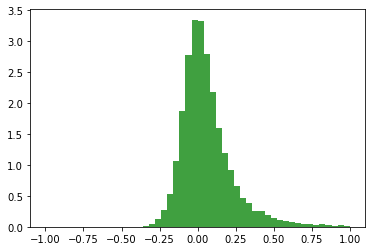

In [105]:
reldiff = (Y_predict - Y_train) / Y_train
plt.hist(reldiff, 50, range=(-1, 1), density=True, facecolor='g', alpha=0.75)

In [106]:
reldiff.describe()

count    20000.000000
mean         0.074479
std          0.333355
min         -0.381725
25%         -0.045393
50%          0.030417
75%          0.131102
max         32.569000
Name: preis, dtype: float64

In [107]:
reldiff.describe()

count    20000.000000
mean         0.074479
std          0.333355
min         -0.381725
25%         -0.045393
50%          0.030417
75%          0.131102
max         32.569000
Name: preis, dtype: float64

In [108]:
testdata = df1.loc[df["preis"].isnull()]

test2 = testdata[columns]

In [109]:

Y = regr.predict(test2.values)

In [110]:
solution = pd.DataFrame({"id": testdata["id"], "preis": Y})
solution.preis.describe()

count    5000.000000
mean      219.199376
std       146.365769
min        69.990000
25%       133.305000
50%       175.010000
75%       243.890000
max      1526.890000
Name: preis, dtype: float64

In [111]:
svs = solution.values

svs[:10][2]

array([30002.  ,   193.93])

In [112]:
now = datetime.now() 
date_time = now.strftime("%m-%d-%Y-%H-%M-%S")

with open("airbooking_solution2_" + date_time + ".csv", "w") as f:
    f.write("667d386490274f58e4a09ee7d5ec9c9d7b47f7e3ba31c12d7e8bd2202eac2cce\n")
    f.write("Der Verstärker ist nicht dabei...\n")
    f.write("\n".join([str(int(line[0])) + " " + str(int(line[1])) for line in svs]) + "\n")